In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to load raw data and preprocess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_1790/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [25]:
nrows = None
# import txt data
X = pd.read_fwf('data/raw/train/X_train.txt', nrows=nrows, header=None)
y = pd.read_fwf('data/raw/train/y_train.txt', nrows=nrows, header=None)
df_labels = pd.read_fwf('data/raw//activity_labels.txt', nrows=nrows, header=None)
feature_names = pd.read_fwf('data/raw/features.txt', nrows=nrows, header=None)

print(f'{X.shape=}')
display(X.head())
print(f'{y.shape=}')
display(y.head())
display(df_labels)
display(feature_names.head())

X.shape=(7352, 561)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


y.shape=(7352, 1)


,0
0,5
1,5
2,5
3,5
4,5


,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


In [26]:
# join feature names to X
X.columns = feature_names[0]
display(X.head())

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFre,553 fBodyBodyGyroJerkMag-skewnes,554 fBodyBodyGyroJerkMag-kurtosi,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),grav","557 angle(tBodyGyroMean,gravityM","558 angle(tBodyGyroJerkMean,grav","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [27]:
# replace y with activity names
y.columns = ['activity']
y['activity'] = y['activity'].map(dict(df_labels.values))
display(y.head(5))

,activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [28]:
# join X and y
df = pd.concat([X, y], axis=1)
display(df.head())

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewnes,554 fBodyBodyGyroJerkMag-kurtosi,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),grav","557 angle(tBodyGyroMean,gravityM","558 angle(tBodyGyroJerkMean,grav","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


# EDA

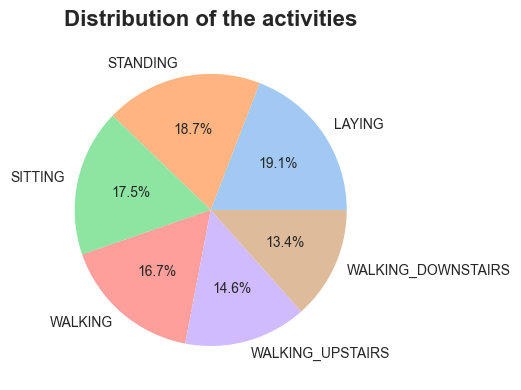

In [29]:
# distribution of activities
colors = sns.color_palette('pastel')[0:6]
df['activity'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.ylabel('')
plt.title('Distribution of the activities')
plt.show()

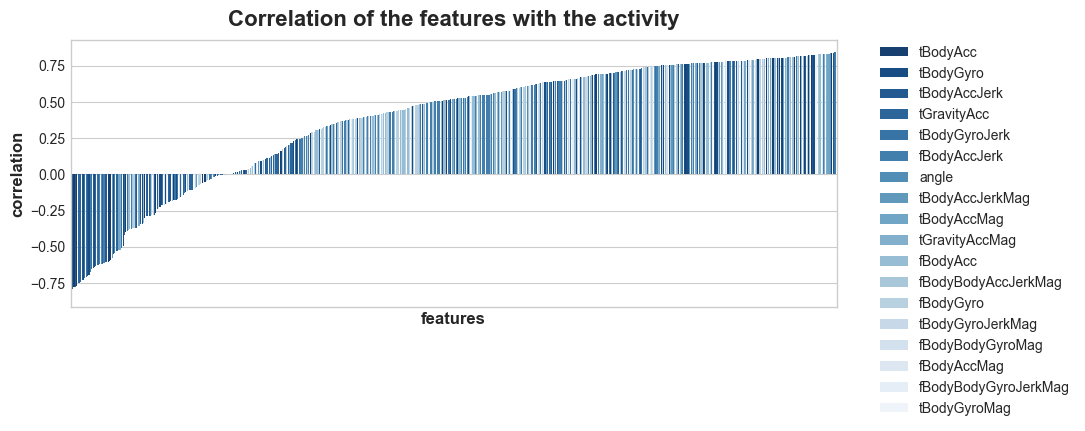

In [111]:
# plot correlation of features with the activity using seaborn
data = pd.DataFrame(df_temp.corr()['activity'].drop('activity')).reset_index().sort_values(by='activity')
data = data.rename(columns={'index': 'features'})
data['feature_group'] = data['features'].apply(lambda x: x.split('-')[0])
data['feature_group'] = data['feature_group'].apply(lambda x: x.split('(')[0])
data['feature_group'] = data['feature_group'].apply(lambda x: x.split(' ')[-1])

# seaborn blue color palette

sns.barplot(data, x='features', y='activity', hue='feature_group', dodge=False, palette='Blues_r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.
            )
# remove the ticks
plt.xticks([])
plt.ylabel('correlation')
plt.title('Correlation of the features with the activity')
plt.show()

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_1790/2669659079.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = data_temp.groupby('feature_group').mean().reset_index()


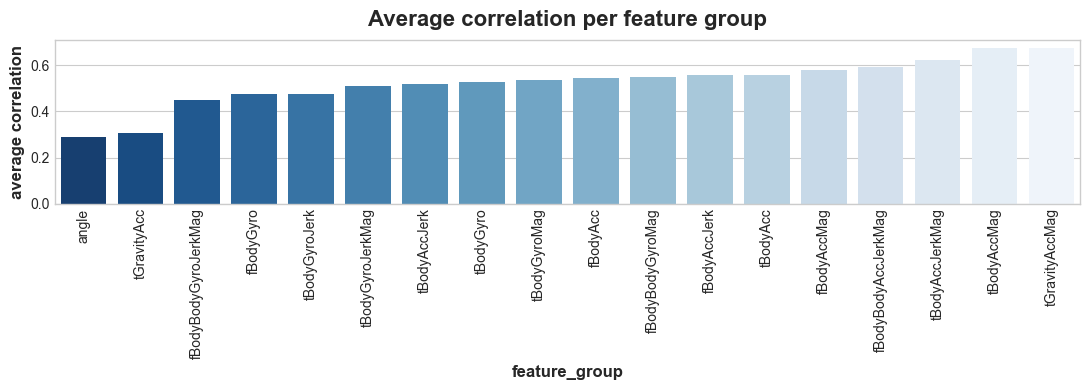

In [116]:
# average correlation based on feature_group using absolute values
# absolute values are used to avoid the negative values
data_temp = data.copy()
data_temp['activity'] = data_temp['activity'].abs()
data_temp = data_temp.groupby('feature_group').mean().reset_index()
data_temp = data_temp.sort_values(by='activity')
sns.barplot(data_temp, x='feature_group', y='activity', dodge=False, palette='Blues_r', errorbar=None)
plt.title('Average correlation per feature group')
plt.ylabel('average correlation')
# rotate the xticks
plt.xticks(rotation=90)
plt.show()


In [117]:
# check for missing values as a percentage of the total number of values
df.isna().sum().sum() / df.size

0.0

# Summary
1. The data is balanced
2. Majority of the features have high correlation with the target
3. On average, each feature group has relatively high correlation with the target
3. There are no missing values